# ML_regressions (Tasca M6 T01)
### Descripció:
Exercicis per practicar amb regressions.
- Exercici 1:
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.
- Exercici 2:
Compara’ls en base al MSE i al R2.
- Exercici 3:
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.
- Exercici 4:
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).
- Exercici 5:
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

Pasos de base a seguir para el aprendizaje automático (machine learning):

antes de realizar el ejercicio 1, debemos:
- Adquirir los datos en un formato accesible.
- Identificar y corregir puntos/anomalías de datos faltantes según sea necesario

Luego, entrando en el ejercicio 1, preparamos los datos para el modelo de aprendizaje automático.

1.- Establecemos los modelos de referencia que pretendamos superar (en este caso he elegido la Regresión Lineal y el Random Forest)

2.- Entrenamos el modelo con los datos de entrenamiento.

3.- Hacemos las predicciones sobre los datos de prueba.

4.- Comparamos las predicciones con los objetivos del conjunto de pruebas conocidos y calculamos las métricas de rendimiento.

(-Si el rendimiento no es satisfactorio, ajustamos el modelo, adquirimos más datos o probamos una técnica de modelado diferente).

5.- Interpretamos el modelo y reportamos los resultados visual y numéricamente.

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder


In [188]:
cd /Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2

/Users/thaisrocafull/Documents/CURSOS_I_APUNTS/data_science/SPRINT 5/Tasca M5T2


In [189]:
dfO = pd.read_csv('housing data.csv', encoding="latin-1", sep=',', header=None, names=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

Hay tres errores principales (métricas) que se utilizan para evaluar modelos: error medio absoluto, error cuadrático medio y puntuación R2.

In [190]:
dfO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [191]:
pd.options.display.float_format = '{:.2f}'.format
dfO.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.00,3.61,8.60,0.01,0.08,0.26,3.68,88.98
ZN,506.00,11.36,23.32,0.00,0.00,0.00,12.50,100.00
INDUS,506.00,11.14,6.86,0.46,5.19,9.69,18.10,27.74
CHAS,506.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00
NOX,506.00,0.55,0.12,0.38,0.45,0.54,0.62,0.87
RM,506.00,6.28,0.70,3.56,5.89,6.21,6.62,8.78
AGE,506.00,68.57,28.15,2.90,45.02,77.50,94.07,100.00
DIS,506.00,3.80,2.11,1.13,2.10,3.21,5.19,12.13
RAD,506.00,9.55,8.71,1.00,4.00,5.00,24.00,24.00
TAX,506.00,408.24,168.54,187.00,279.00,330.00,666.00,711.00


- Esta tabla contiene datos sobre el valor de las casas en los suburbios de **Boston.**
Consta de 506 filas y 14 atributos con rango continuo de valores.
- El conjunto de datos contiene atributos numéricos continuos, una variable objetivo o de etiqueta (class attribute) y al menos un atributo binario (binary-valued attribute).

INFORMACIÓN DE LOS ATRIBUTOS: 

| Número | Nombre de la Columna                     | Descripción                                 |
| ------:| ----------------------------------------:| ------------------------------------------ |
| 1      | CRIM                                   | Tasa de criminalidad per cápita por ciudad. |
| 2      | ZN                                     | Proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados. |
| 3      | INDUS                                  | Proporción de acres de negocios no minoristas por ciudad. |
| 4      | CHAS                                  | Variable ficticia del río Charles (igual a 1 si el área limita con el río, 0 en caso contrario). |
| 5      | NOX                                    | Concentración de óxidos nítricos (en partes por 10 millones). |
| 6      | RM                                     | Número promedio de habitaciones por vivienda. |
| 7      | AGE                                    | Proporción de unidades ocupadas por sus dueños construidas antes de 1940. |
| 8      | DIS                                    | Distancias ponderadas a cinco centros de empleo en Boston. |
| 9      | RAD                                    | Índice de accesibilidad a carreteras radiales. |
| 10     | TAX                                    | Tasa de impuesto a la propiedad de valor completo por cada $10,000. |
| 11     | PTRATIO                                | Relación alumno-maestro por ciudad. |
| 12     | B                                      | 1000(Bk - 0.63)^2 donde Bk es la proporción de residentes afroamericanos por ciudad. |
| 13     | LSTAT                                 | Porcentaje de la población con estatus socioeconómico bajo. |
| 14     | MEDV                                  | Valor medio de las viviendas ocupadas por sus dueños en miles de dólares. |

- Todos los atributos corresponden a variables independientes y podemos afirmar que nuestra variable objetivo (Target) es MEDV, puesto que define un valor medio, cosa que todas las otras variables no hacen.

In [192]:
# Comprobamos si hay valores nulos o nan
dfna= dfO.isna().sum().sum()
dfnu= dfO.isnull().sum().sum()
print ("La cantidad de valores NaN en la tabla es:",dfna)
print ("La cantidad de valores Null en la tabla es:",dfnu)
    
# comprobamos si hay duplicados
dfs = dfO.loc[dfO.duplicated()].sum().sum()
print ("La cantidad de duplicados en la tabla es:",dfs)

La cantidad de valores NaN en la tabla es: 0
La cantidad de valores Null en la tabla es: 0
La cantidad de duplicados en la tabla es: 0.0


- Hacemos mapa de correlación de las variables.

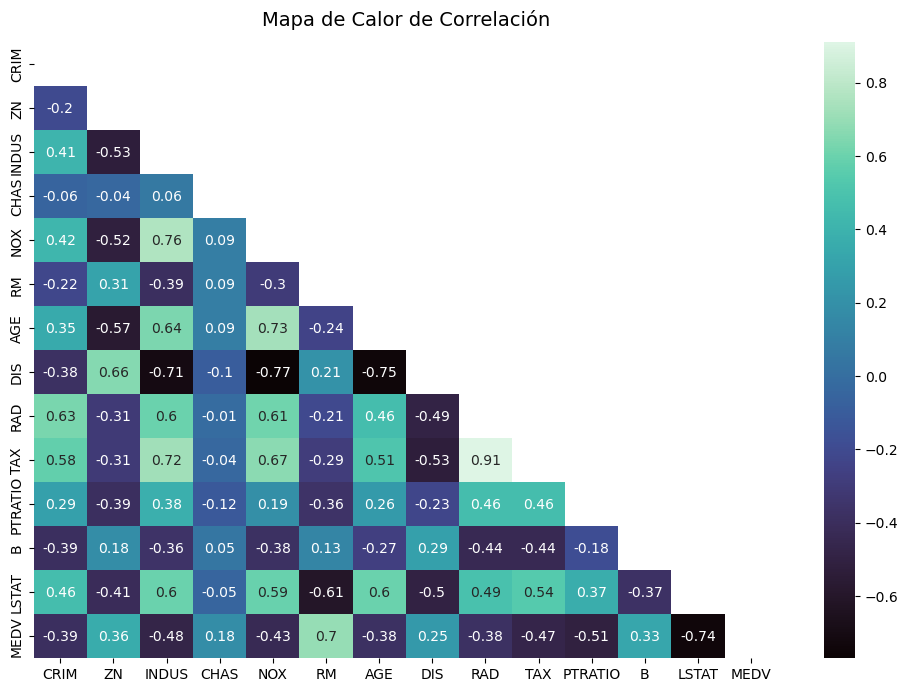

In [227]:
mask = np.triu(np.ones_like(dfO.corr().round(2))) 
plt.figure(figsize=(12, 8))
ax= sns.heatmap(dfO.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Mapa de Calor de Correlación', fontdict={'fontsize':14}, pad=12);

- Observamos que destacan solo 2 variables con correlación positiva y negativa cercana al target MEDV. Lstat (estatus social más bajo), muestra una correlación negativa, puesto que cuanto menor es el estatus social, mayor es MEDV (valor medio). En el caso de la variable RM (número de habitaciones de las casas), cuantas más habitaciones tiene una casa, más aumenta el valor medio de la vivienda.

Antes de realizar la estandarización, realizamos un Boxplot para detectar los Outliers (valores atípicos) y de este modo eligir el modelo a aplicar.

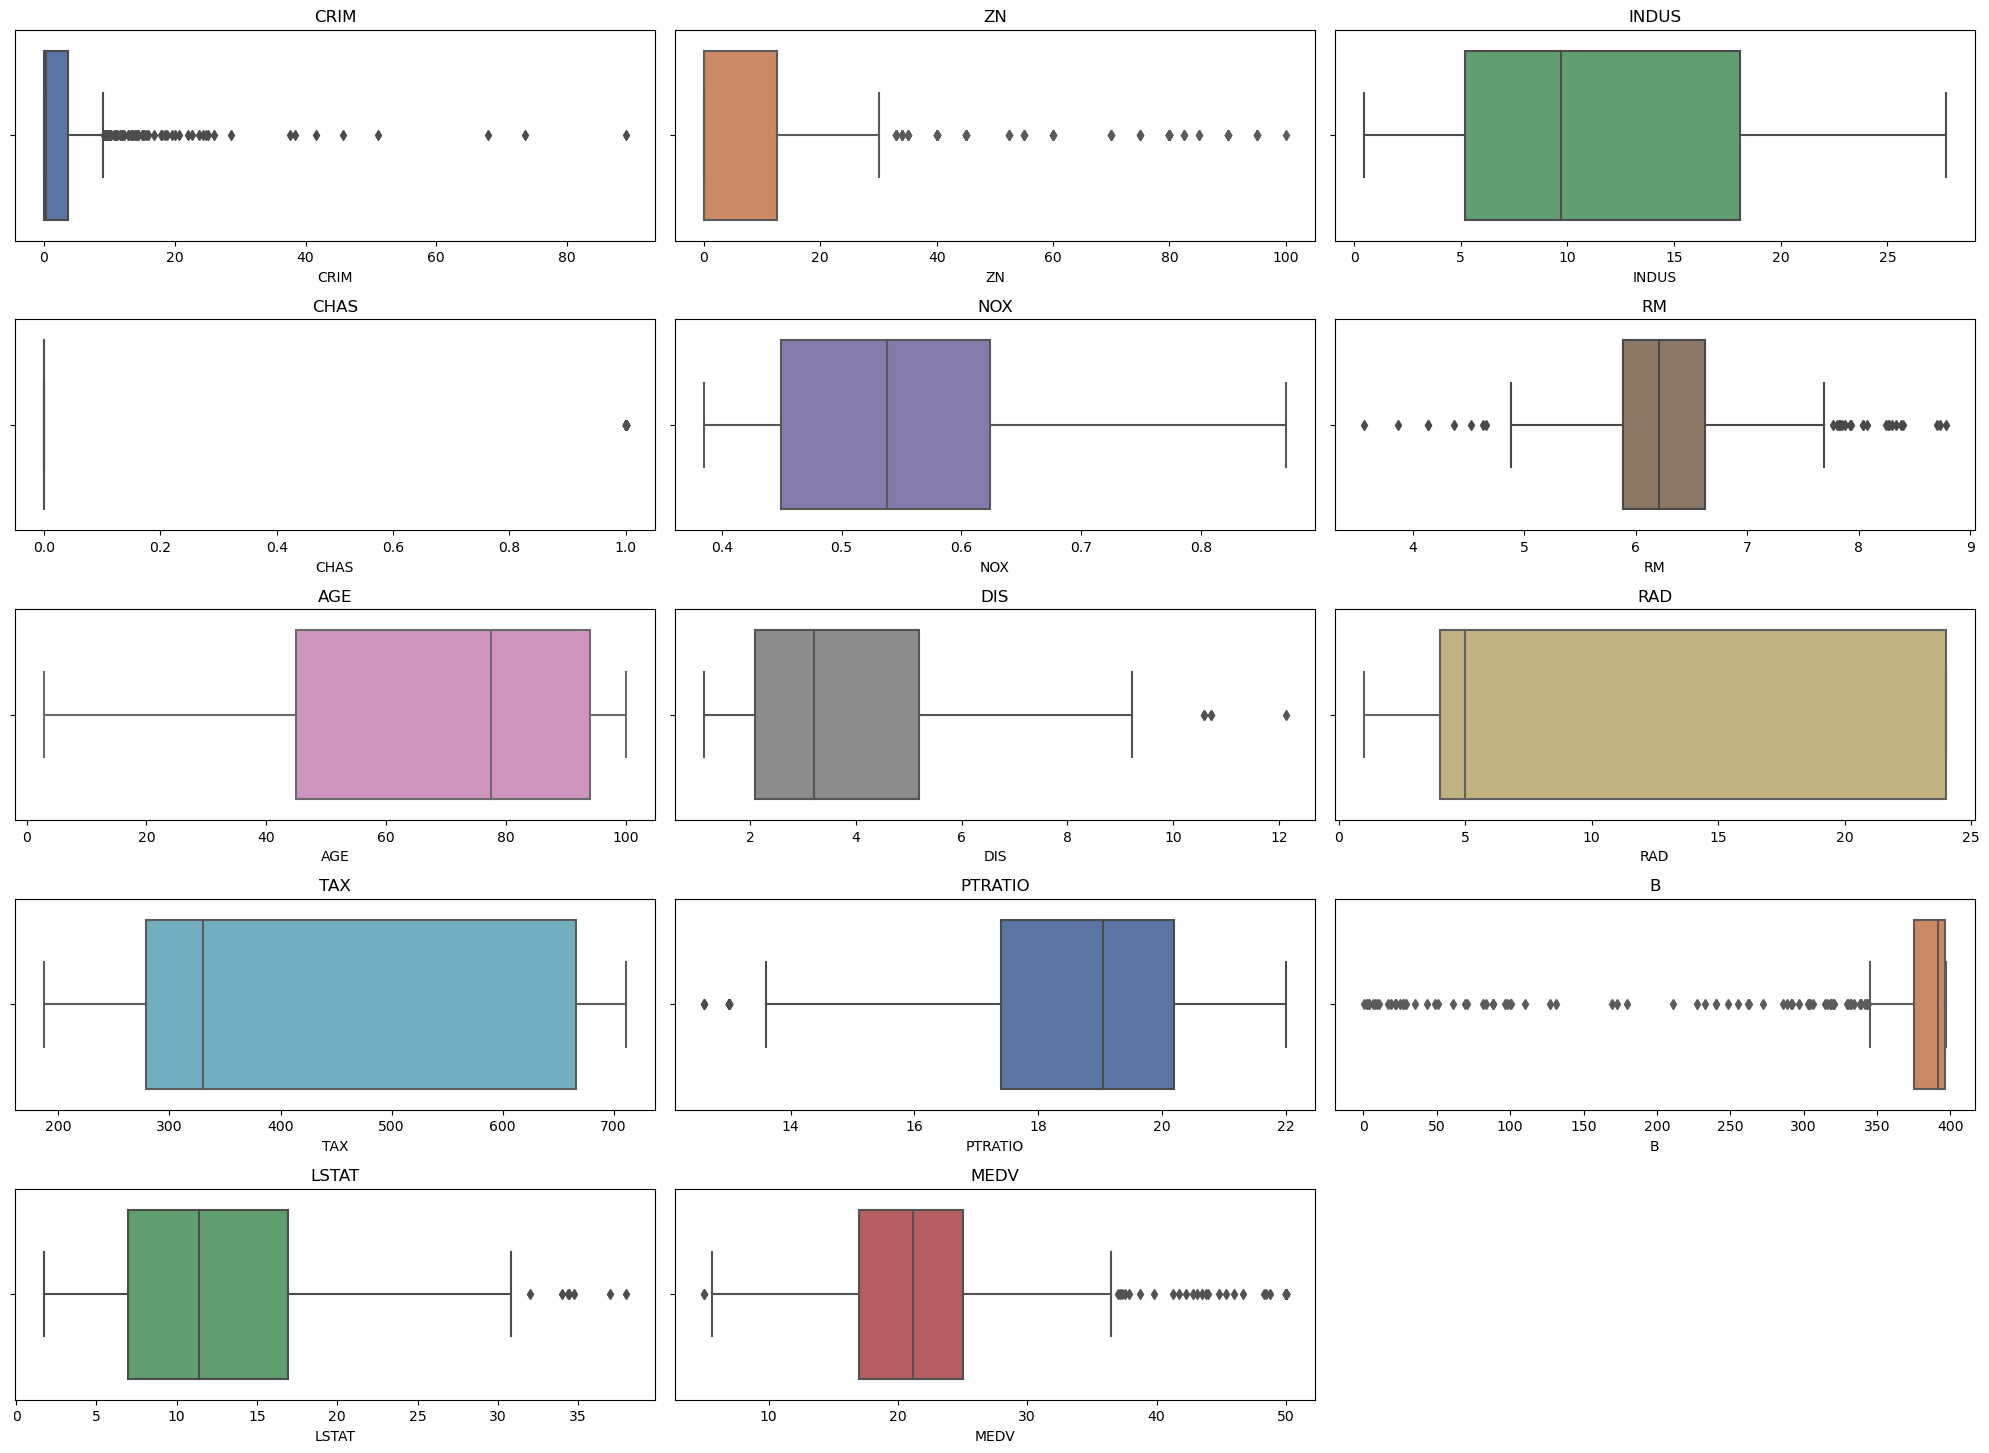

In [194]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("deep", n_colors=14)
num_columns = 3
for i, column in enumerate(dfO.columns):
    plt.subplot(7, num_columns, i + 1)
    sns.boxplot(x=dfO[column], orient="h", color=palette[i])
    plt.title(f'{column}')
    plt.tight_layout()

plt.show()

- Las variables con valores atípicos son: Crim, Zn, Rm, Dis, Ptratio, B, Lstat y El target MEDV. 

***Procesamiento del dataset***

- Convertimos CHAS a Categórica y procesamos RAD para tener 9 categorías, una por cada carretera. 

In [228]:
df = dfO.copy()

In [229]:
df['CHAS'] = df['CHAS'].astype('category')

In [230]:
df_RAD=pd.get_dummies(df['RAD'], prefix='RAD')

In [231]:
dfC = pd.concat([df.drop('RAD', axis=1), df_RAD], axis=1)
dfC

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,296.00,15.30,396.90,4.98,24.00,1,0,0,0,0,0,0,0,0
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,242.00,17.80,396.90,9.14,21.60,0,1,0,0,0,0,0,0,0
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,242.00,17.80,392.83,4.03,34.70,0,1,0,0,0,0,0,0,0
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,222.00,18.70,394.63,2.94,33.40,0,0,1,0,0,0,0,0,0
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,222.00,18.70,396.90,5.33,36.20,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,273.00,21.00,391.99,9.67,22.40,1,0,0,0,0,0,0,0,0
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,273.00,21.00,396.90,9.08,20.60,1,0,0,0,0,0,0,0,0
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,273.00,21.00,396.90,5.64,23.90,1,0,0,0,0,0,0,0,0
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,273.00,21.00,393.45,6.48,22.00,1,0,0,0,0,0,0,0,0


In [235]:
col_escal = ['INDUS', 'NOX', 'AGE', 'TAX']
minmax_scaler = MinMaxScaler()
dfC[col_escal] = minmax_scaler.fit_transform(dfC[col_escal])

col_out = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'PTRATIO']
robust_scaler = RobustScaler()
dfC[col_out] = robust_scaler.fit_transform(df[col_out])

In [236]:
dfC.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,0.93,0.91,0.39,0.35,0.10,0.68,0.19,0.42,-0.21,-1.67,0.13,22.53,0.04,0.05,0.08,0.22,0.23,0.05,0.03,0.05,0.26
std,2.39,1.87,0.25,0.24,0.95,0.29,0.68,0.32,0.77,4.38,0.71,9.20,0.20,0.21,0.26,0.41,0.42,0.22,0.18,0.21,0.44
min,-0.07,0.00,0.00,0.00,-3.59,0.00,-0.67,0.00,-2.30,-18.76,-0.96,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.05,0.00,0.17,0.13,-0.44,0.43,-0.36,0.18,-0.59,-0.77,-0.44,17.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.34,0.31,0.00,0.77,0.00,0.27,0.00,0.00,0.00,21.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.95,1.00,0.65,0.49,0.56,0.94,0.64,0.91,0.41,0.23,0.56,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,24.68,8.00,1.00,1.00,3.48,1.00,2.89,1.00,1.05,0.26,2.66,50.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


- Observamos que los rangos de las variables escaladas oescilan entre el 0 y el 1 más o menos. Y que RAD empieza a tener valores decimales.

### - Exercici 1: ###
Crea almenys dos models de regressió diferents per intentar predir el millor possible el preu de les vivendes (MEDV) de l'arxiu adjunt.

1. Regresión Lineal (Linear Regression):   entre las características y la variable objetivo:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

2. Regresión Ridge: Similar a la regresión lineal, pero agrega una penalización para evitar la multicolinealidad.

from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)

3. Regresión Lasso: Similar a Ridge, pero utiliza una penalización diferente que puede llevar algunos coeficientes a exactamente cero, lo que conduce a la selección de características.

from sklearn.linear_model import Lasso
model = Lasso(alpha=1.0)

4. Regresión Elastic Net: Combina las penalizaciones de Ridge y Lasso.

from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

5. Regresión de Support Vector Machines (SVR): Utiliza vectores de soporte para encontrar una función que se ajuste a los datos.

from sklearn.svm import SVR
model = SVR(kernel='linear')

6. Regresión de Árboles de Decisión:

Utiliza un árbol de decisiones para modelar la relación entre las características y la variable objetivo.

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

7. Regresión de Bosques Aleatorios (Random Forest Regressor): Un conjunto de árboles de decisión que promedian las predicciones.

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

8. Regresión de Gradient Boosting: Un conjunto de árboles de decisión que se construyen secuencialmente, cada uno corrigiendo los errores del anterior.

from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

9. Regresión de Redes Neuronales (MLPRegressor): Utiliza una red neuronal para aprender la relación entre las características y la variable objetivo.

from sklearn.neural_network import MLPRegressor
model = MLPRegressor()

- Primero debo dividir el df en train y test para evaluar el rendimiento del modelo: 

In [243]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1) #data
y = df['MEDV'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [244]:
X_train.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00,404.00
mean,0.96,0.92,0.39,0.35,0.08,0.67,0.20,9.47,0.41,-0.22,-1.64,0.14
std,2.54,1.86,0.25,0.24,0.93,0.29,0.69,8.68,0.32,0.77,4.39,0.72
min,-0.07,0.00,0.00,0.00,-3.59,0.00,-0.67,1.00,0.00,-2.30,-18.76,-0.96
25%,-0.05,0.00,0.17,0.13,-0.45,0.42,-0.36,4.00,0.17,-0.65,-0.74,-0.43
50%,-0.01,0.00,0.32,0.31,-0.04,0.76,0.03,5.00,0.27,-0.02,0.01,0.01
75%,0.93,1.60,0.65,0.49,0.57,0.94,0.63,24.00,0.91,0.41,0.23,0.57
max,24.68,8.00,1.00,1.00,3.48,1.00,2.89,24.00,1.00,1.05,0.26,2.66


In [245]:
X_test.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00,102.00
mean,0.84,0.86,0.40,0.36,0.19,0.70,0.15,9.86,0.46,-0.19,-1.76,0.08
std,1.67,1.88,0.25,0.23,1.02,0.27,0.66,8.85,0.32,0.77,4.35,0.68
min,-0.07,0.00,0.03,0.01,-2.81,0.07,-0.66,1.00,0.01,-2.16,-18.41,-0.94
25%,-0.05,0.00,0.17,0.20,-0.30,0.52,-0.37,4.00,0.22,-0.59,-0.97,-0.46
50%,0.02,0.00,0.35,0.32,0.16,0.78,-0.10,5.00,0.38,0.05,-0.05,-0.05
75%,0.96,0.00,0.65,0.49,0.55,0.95,0.64,24.00,0.91,0.41,0.24,0.51
max,10.40,7.60,1.00,1.00,3.41,1.00,2.43,24.00,1.00,0.77,0.26,1.86


Haré dos modelos bien diferentes:

**regresión lineal**, que es el más simple para tener una referencia inicial.
    
Luego un **Random Forest o Gradient Boosting**.

Realizaré ajuste de hiperparámetros para optimizar el rendimiento de los modelos seleccionados. 

In [240]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

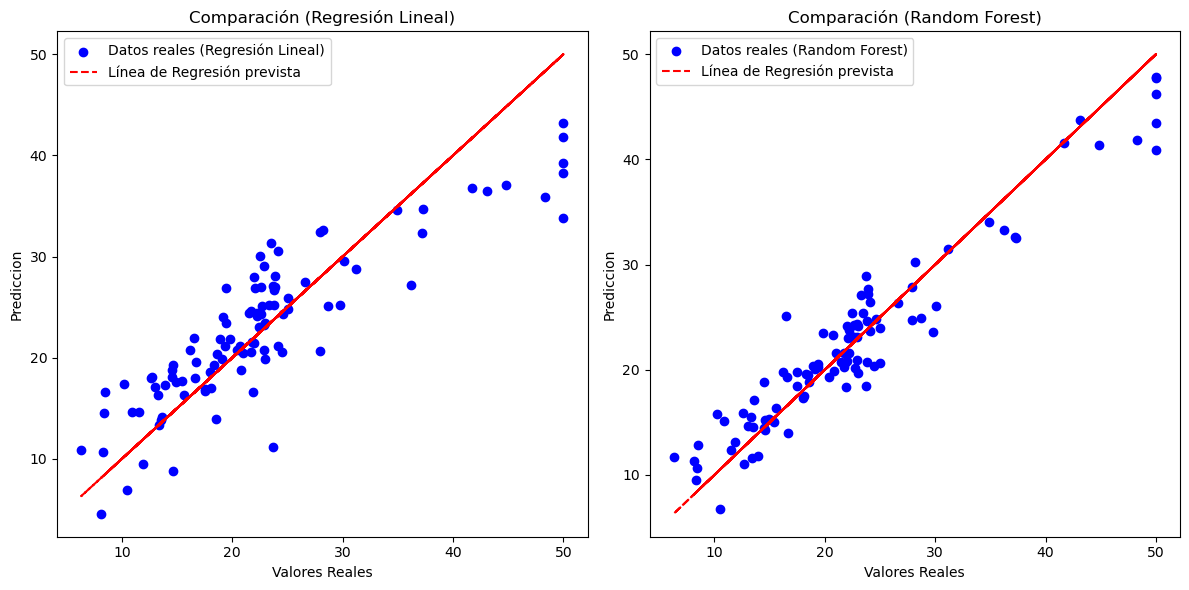

In [256]:
modelos = [lr, rfr] #lista de los modelos que he aplicado
nombres_modelos = ['Regresión Lineal', 'Random Forest']

plt.figure(figsize=(12, 6))

for i, modelo in enumerate(modelos):
   
    pred = modelo.predict(X_test)  # Predicciones del modelo actual
    plt.subplot(1, len(modelos), i+1)
    plt.scatter(y_test, pred, label=f'Datos reales ({nombres_modelos[i]})', color='blue')
    plt.plot(y_test, y_test, color='red', label='Línea de Regresión prevista', linestyle='--')
    plt.xlabel('Valores Reales')
    plt.ylabel('Prediccion')
    plt.title(f'Comparación ({nombres_modelos[i]})')
    plt.legend()

plt.tight_layout()
plt.show()

### - Exercici 2: ###
Compara’ls en base al MSE i al R2.

Hay 3 métricas principales para la evaluación de modelos en regresión:
1. R cuadrado/R cuadrado ajustado (es el cuadrado del coef de corr)

2. Error cuadrático medio (MSE)/Error cuadrático medio (RMSE)

3. Error absoluto medio (MAE)

Se refiere a evaluar la calidad predictiva de los dos modelos de regresión aplicados en el ejercicio anterior: (Regresión Lineal y Random Forest) en base a dos métricas comunes: Mean Squared Error (MSE) y R² (R cuadrado).

**Mean Squared Error (MSE)**: Esta métrica mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. 
- Un MSE más bajo indica un mejor ajuste del modelo.

**R² (R cuadrado)**: Esta métrica proporciona una medida de qué tan bien las predicciones se ajustan a los valores reales. R² varía entre 0 y 1, donde ***1 indica un ajuste perfecto***. Un valor más alto de R² indica un mejor rendimiento.

Sabremos cuán fiables son los modelos en términos de la precisión:

- Un modelo con un MSE más bajo y un R² más alto generalmente se considera mejor en términos de precisión predictiva.

In [259]:
from sklearn.metrics import mean_squared_error, r2_score

# Lista para almacenar las métricas
mse_scores = []
r2_scores = []

# Calcular métricas para cada modelo
for modelo in modelos:
    pred = modelo.predict(X_test)
    
    # Calcular MSE
    mse = mean_squared_error(y_test, pred)
    mse_scores.append(mse)

    # Calcular R²
    r2 = r2_score(y_test, pred)
    r2_scores.append(r2)

# Imprimir resultados
for i, nombre_modelo in enumerate(nombres_modelos):
    print(f'{nombre_modelo}:')
    print(f'MSE: {mse_scores[i]:.2f}')
    print(f'R²: {r2_scores[i]:.2f}')
    print('\n')


Regresión Lineal:
MSE: 23.38
R²: 0.76


Random Forest:
MSE: 8.69
R²: 0.91




***Regresión Lineal***:
- Mean Squared Error (MSE): 23.38
Las predicciones están a una distancia de alrededor de 23.38 unidades al cuadrado de los valores reales.
- R² (R cuadrado): 0.76
Aproximadamente el 76% de la variabilidad en la variable de respuesta (variable objetivo: MED) ha sido explicada por el modelo.

***Random Forest***:
- Mean Squared Error (MSE): 8.69
Un MSE más bajo que el de la Regresión Lineal indica que las predicciones del modelo Random Forest están más cerca de los valores reales en promedio.
- R² (R cuadrado): 0.91
Un R² de 0.91 es bastante alto y sugiere que el modelo Random Forest explica aproximadamente el 91% de la variabilidad en la variable de respuesta.

El modelo Random Forest tiene un mejor rendimiento en base a ambas métricas.

El MSE más bajo del modelo Random Forest indica que las predicciones tienden a estar más cerca de los valores reales en comparación con la Regresión Lineal.

Random Forest parece ser más efectivo en este caso particular. Sin embargo, siempre es importante considerar otros factores y validar los modelos en conjuntos de datos diferentes para obtener una evaluación más completa de su rendimiento.

### - Exercici 3: ###
Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.

1. **n_estimators**:
El número de árboles en el bosque. Un valor más alto generalmente mejora el rendimiento, pero también aumenta el tiempo de entrenamiento.

RandomForestRegressor(n_estimators=100)

2. **max_depth**: La profundidad máxima de cada árbol en el bosque. Controla la complejidad del modelo. Ajusta este valor para evitar sobreajuste.

RandomForestRegressor(max_depth=10)

3. **min_samples_split**: El número mínimo de muestras requeridas para dividir un nodo interno. Un valor más alto previene divisiones que generan nodos con muy pocas muestras.

RandomForestRegressor(min_samples_split=2)

4. **min_samples_leaf**: El número mínimo de muestras requeridas en un nodo hoja. Ajusta esto para evitar hojas con muy pocas muestras.

RandomForestRegressor(min_samples_leaf=1)


5. **max_features**: La cantidad de características a considerar al buscar la mejor división. Puedes ajustar este valor para controlar la aleatoriedad en la construcción de cada árbol.

RandomForestRegressor(max_features='sqrt')

In [266]:
from sklearn.ensemble import RandomForestRegressor

# Ajustar los parámetros según tus preferencias
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model = RandomForestRegressor(**rf_params)
# Ajustar el modelo al conjunto de entrenamiento
rf_model.fit(X_train, y_train)
# Lista para almacenar las métricas
mse_scores = []
r2_scores = []

# Calcular métricas para el modelo Random Forest ajustado
pred_rf = rf_model.predict(X_test)

# Calcular MSE
mse_rf = mean_squared_error(y_test, pred_rf)
mse_scores.append(mse_rf)

# Calcular R²
r2_rf = r2_score(y_test, pred_rf)
r2_scores.append(r2_rf)

# Imprimir resultados
print('Random Forest (ajustado):')
print(f'MSE: {mse_rf:.2f} unidades al cuadrado de valores reales.')
print(f'R²: {r2_rf:.2f} variabilidad de la variable')


Random Forest (ajustado):
MSE: 11.30 unidades al cuadrado de valores reales.
R²: 0.89 variabilidad de la variable


En relación al "Mean Squared Error" (MSE): 

Estos datos tienen una dispersión moderada, un MSE más bajo generalmente indica un mejor rendimiento.

Y en relación al "R²" (R cuadrado):

Este valor indica el % de la variabilidad en la variable de respuesta (variable objetivo). 88% es bastante alto y esto sugiere un buen ajuste del modelo.

- Los datos han aprendido bien y tienen un buen poder predictivo.

### - Exercici 4: ###
Compara el seu rendiment emprant l’aproximació traint/test o emprant totes les dades (validació interna).

**Validación Externa (Train-Test Split)**:

Con la Validación externa, hacemos una estimación imparcial, pero al hacer elecciones aleatorias, contamos con una cantidad limitada de datos de prueba y podría no ser representativa de ciertas variaciones de datos. Nos sirve para aprovechar al máximo los datos. Útil para evaluar la capacidad de generalización de nuevos modelos de datos.

**Validación Interna (Usando Todos los Datos)**:
Al usar todos los datos, resulta ser un modelo más preciso, pero puede conducir a una sobreestimación del rendimiento del modelo, ya que el modelo ha visto todos los datos durante el entrenamiento.
No proporciona una estimación imparcial del rendimiento en datos no vistos.

Hay que usarla con **validación cruzada** (Cross Validation)para obtener una estimación más robusta del rendimiento. 

Puede ser útil cuando hay limitaciones en la cantidad de datos y se necesita aprovechar al máximo la información disponible.

In [270]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Ajustar los parámetros según preferencias...
rf_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model = RandomForestRegressor(**rf_params)

# Realizar validación cruzada con, en este caso: 5 pliegues
cv_scores_mse = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprimir resultados
print(f'MSE para cada pliegue:\n {cv_scores_mse}')
print(f'R² para cada pliegue: \n{cv_scores_r2}')

# Imprimir resultados promedio
print(f'MSE promedio: {cv_scores_mse.mean()}')
print(f'R² promedio: {cv_scores_r2.mean()}')


MSE para cada pliegue:
 [ 9.20732972 16.55708855 22.51597712 44.51219314 22.61393238]
R² para cada pliegue: 
[0.73853077 0.80998715 0.74217808 0.48459601 0.44605145]
MSE promedio: 23.081304182867534
R² promedio: 0.6442686901064605


- Los valores tienen mucha variabilidad entre pliegues, puesto que oscilan entre 9.21 el más bajo y el más alto alrededor de 44.51.

- El coeficiente de determinación (R²) explica que el modelo tiene entre el 45% y el 81% de la variabilidad en los diferentes pliegues.

- MSE promedio: La media general del rendimiento del modelo en la validación cruzada, es bastante bajo y cuanto más bajo sea el MSE, mejor será el rendimiento. Por lo que entiendo que tiene un buen rendimiento. 

- R² promedio: Cuanto más cercano a 1 sea el R², mejor será el rendimiento. sale un restultado más bien alto pero dispersión moderada en las predicciones.

### Exercici 5: ###  
No facis servir la variable del nombre d'habitacions (RM) a l’hora de fer prediccions.

In [274]:
# Eliminar la columna 'RM' del conjunto de características
X_sin_RM = X.drop('RM', axis=1)

# Inicializar el modelo Random Forest con los parámetros ajustados
rf_model_sin_RM = RandomForestRegressor(**rf_params)

# Realizar validación cruzada con 5 pliegues
cv_scores_mse = -cross_val_score(rf_model_sin_RM, X_sin_RM, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_r2 = cross_val_score(rf_model_sin_RM, X_sin_RM, y, cv=5, scoring='r2')

# Imprimir resultados
print(f'MSE para cada pliegue:\n {cv_scores_mse}')
print(f'R² para cada pliegue:\n {cv_scores_r2}')

# Imprimir resultados promedio
print(f'MSE promedio: {cv_scores_mse.mean()}')
print(f'R² promedio: {cv_scores_r2.mean()}')


MSE para cada pliegue:
 [14.90471522 24.05161747 52.47447825 42.57992153 20.99339756]
R² para cada pliegue:
 [0.52921284 0.74306254 0.36989661 0.56810633 0.30502692]
MSE promedio: 31.00082600576505
R² promedio: 0.5030610484243245


- MSE para cada pliegue:los valores varían, siendo el más bajo alrededor de 15.79 y el más alto alrededor de 51.99.

- R²: los valores varían, indicando diferentes niveles de ajuste en cada pliegue.

- MSE promedio: Cuanto más bajo sea el MSE promedio, mejor será el rendimiento del modelo.

- R² promedio: alrededor del 51% de la variabilidad en la variable objetivo está siendo explicada por el modelo.

Ahora, los resultados sugieren que el modelo Random Forest, excluyendo la variable 'RM', tiene un rendimiento moderado. 

El MSE promedio de 30.66 indica una dispersión en las predicciones y el R² promedio de 0.51 indica que el modelo solo explica alrededor del 51% de la variabilidad en la variable objetivo. 

Con lo cual, la variable RM es bastante imprescindible para tener una tabla fiable con buenas predicciones y resultados. 

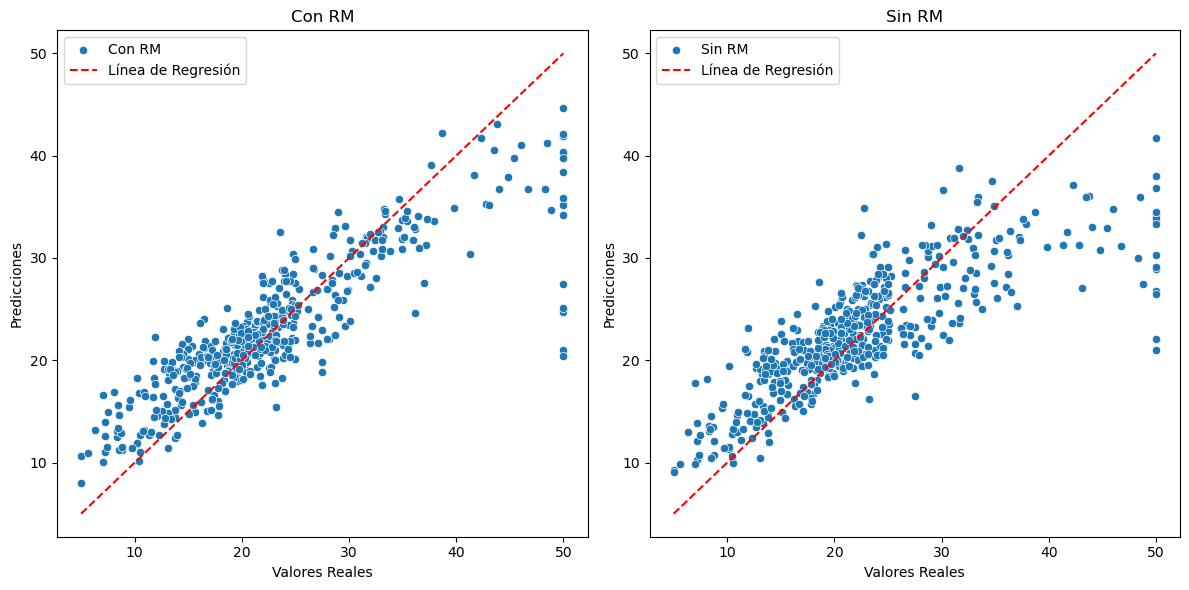

In [279]:
from sklearn.model_selection import cross_val_predict

# Predicciones del modelo con RM
pred_con_RM = cross_val_predict(rf_model, X, y, cv=5)

# Predicciones del modelo sin RM
pred_sin_RM = cross_val_predict(rf_model_sin_RM, X_sin_RM, y, cv=5)

# Crear gráficos de dispersión para comparar predicciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=pred_con_RM, label='Con RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Con RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=pred_sin_RM, label='Sin RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Sin RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.tight_layout()
plt.show()

- Aqui vemos la gráfica aplicando la regresión con Random Forest

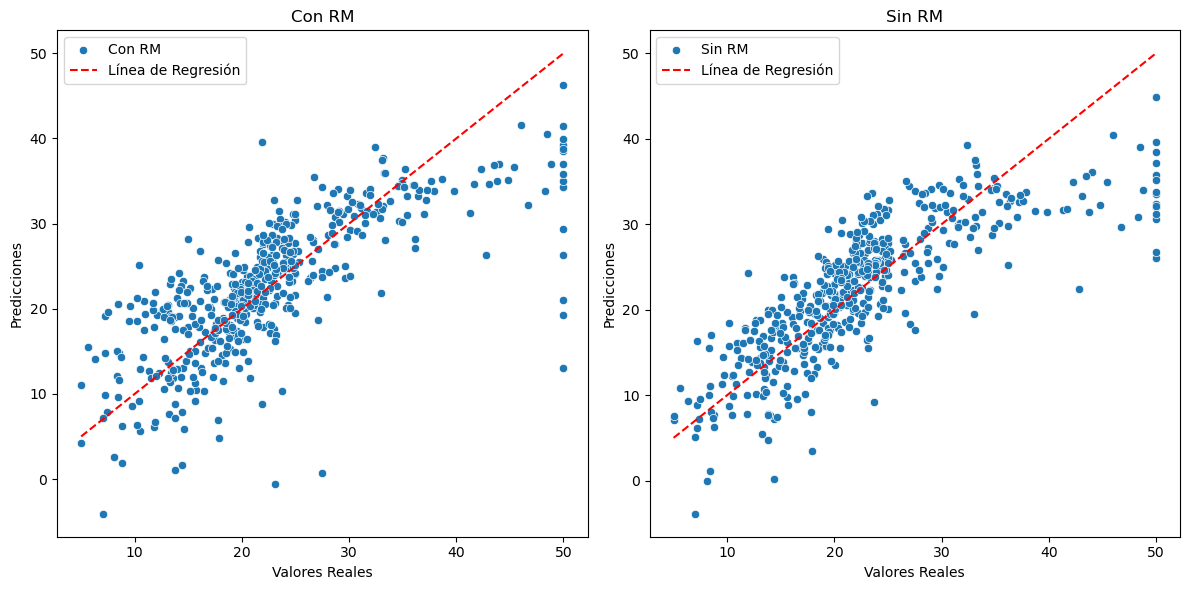

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

# Inicializar el modelo de regresión lineal
lr_model = LinearRegression()

# Predicciones del modelo con RM
pred_lr_con_RM = cross_val_predict(lr_model, X, y, cv=5)

# Predicciones del modelo sin RM
pred_lr_sin_RM = cross_val_predict(lr_model, X_sin_RM, y, cv=5)

# Crear gráficos de dispersión para comparar predicciones
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=pred_lr_con_RM, label='Con RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Con RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y, y=pred_lr_sin_RM, label='Sin RM')
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', label='Línea de Regresión')
plt.title('Sin RM')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()

plt.tight_layout()
plt.show()


- Aquí vemos la regresión lineal.

Visto en las gráficas, no me parecen resultados tan diferentes como con los valores cuantificados.

Asi que supongo que un 51% quizás es suficiente variabilidad.

En ninguno de los dos modelos hemos tenido un sobreajuste con los resultados (Overfitting).